# Day 3
## 2. 단일 모집단에 대한 검정
### 모평균에 대한 검정

In [3]:
# Csi 데이터 불러오기

import pandas as pd
Csi = pd.read_csv("/content/drive/MyDrive/단기기초통계/Day3/data/Csi.csv")
Csi.head()

,ID,Index
0,1,75
1,2,63
2,3,49
3,4,86
4,5,53


In [4]:
# 귀무가설: mu = 70 vs 대립가설: mu > 70 검정

## 양측검정
from scipy.stats import ttest_1samp
import numpy as np
print(np.mean(Csi.Index))  # 표본평균
print(np.std(Csi.Index, ddof=1))  # 표본표준편차
ttest_1samp(Csi.Index, popmean=70)

72.32
11.6


TtestResult(statistic=0.9999999999999969, pvalue=0.32728688127978667, df=24)

In [5]:
# 각 결과 출력

stat, pval = ttest_1samp(Csi.Index, popmean=70)
print("T = ",stat)
print("양측검정: ", pval)
print("단측검정: ", pval/2)

T =  0.9999999999999969
양측검정:  0.32728688127978667
단측검정:  0.16364344063989333


### 모비율에 대한 검정

In [6]:
# 귀무가설: p = 0.15 vs 대립가설: p < 0.15 검정

## 모비율에 대한 정규근사 검정
from statsmodels.stats.proportion import proportions_ztest
stat, pval = proportions_ztest(54, 400, value=0.15, prop_var=0.15, alternative="smaller")
print("Z = ",stat)
print("p = ", pval)

Z =  -0.840168050416805
p =  0.20040708469146745


### 모분산에 대한 검정

In [7]:
# Impurities 데이터 불러오기

Impurities = pd.read_csv("/content/drive/MyDrive/단기기초통계/Day3/data/Impurities.csv")
Impurities.head()

,ID,Volume
0,1,3.6
1,2,3.4
2,3,3.6
3,4,3.7
4,5,3.3


In [8]:
# 귀무가설: sigma2 = 0.09 vs 대립가설: sigma2 < 0.09 검정

n = Impurities.Volume.size
print("표본크기 n = ", n)

s2 = np.var(Impurities.Volume, ddof=1)
print("표본분산 s2 = ", s2)

sigma2 = 0.09
print("귀무가설 하에서의 분산 sigma2 = ", sigma2)

Chi2 = (n-1)*s2/sigma2
print("검정통계량 Chi2 = ", Chi2)

from scipy.stats import chi2
print("기각역 Chi2_0.05(n-1) = ", chi2.ppf(0.95, df=n-1))
pval = chi2.cdf(Chi2, df=n-1)
print("단측 검정의 p = ", pval)

표본크기 n =  16
표본분산 s2 =  0.034000000000000016
귀무가설 하에서의 분산 sigma2 =  0.09
검정통계량 Chi2 =  5.66666666666667
기각역 Chi2_0.05(n-1) =  24.995790139728616
단측 검정의 p =  0.015180452235944669


## 3. 독립표본에 의한 두 모평균의 비교
### 독립 표본 검정

In [9]:
# Reading 데이터 불러오기

Reading = pd.read_csv("/content/drive/MyDrive/단기기초통계/Day3/data/Reading.csv")
Reading.head()

,ID,Group,Score
0,1,New,75
1,2,New,80
2,3,New,72
3,4,New,77
4,5,New,69


In [10]:
# Reading 데이터 Group별 기초통계

Reading.groupby("Group").Score.describe()

,count,mean,std,min,25%,50%,75%,max
Group,,,,,,,,
New,8.0,75.375,4.373214,69.0,71.75,76.0,78.50,81.0
Old,8.0,69.125,4.086126,63.0,67.25,69.0,71.25,76.0


<Axes: xlabel='Group', ylabel='Score'>

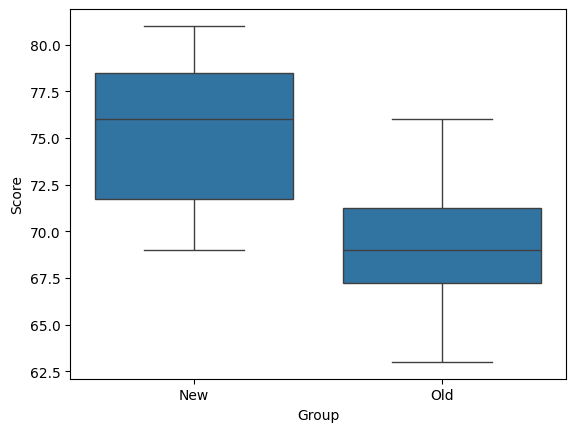

In [13]:
# Reading 데이터 Group별 상자 그림

import seaborn as sns
sns.boxplot(x='Group',y='Score',data=Reading)

In [15]:
# 독립 표본 t-검정

## 집단 나누기
New = Reading[Reading.Group == "New"]
Old = Reading[Reading.Group == "Old"]

## 양측검정, 등분산 가정 <- scipy 패키지
from scipy.stats import ttest_ind
print(ttest_ind(New.Score, Old.Score, equal_var = True))

## 단측검정, 등분산 가정 <- scipy 패키지
stat, pval = ttest_ind(New.Score, Old.Score, equal_var = True)
print("단측검정 p = ", pval/2)

TtestResult(statistic=2.9536127902039953, pvalue=0.010470744188033123, df=14.0)
단측검정 p =  0.005235372094016561


In [17]:
## 단측검정, 등분산 가정 <- statsmodels 패키지
from statsmodels.stats.weightstats import ttest_ind
print(ttest_ind(New.Score, Old.Score, alternative = "larger", usevar="pooled"))

## 단측검정, 이분산 가정 <- statsmodels 패키지
from statsmodels.stats.weightstats import ttest_ind
print(ttest_ind(New.Score, Old.Score, alternative = "larger", usevar="unequal"))

(2.9536127902039953, 0.005235372094016561, 14.0)
(2.9536127902039953, 0.005256688626975243, 13.935945095796395)


## 5. 대응표본에 의한 두 모평균의 비교
### 대응표본 t-검정

In [19]:
# Paired 데이터 불러오기

Paired = pd.read_csv("/content/drive/MyDrive/단기기초통계/Day3/data/Paired.csv")
print(Paired.head())

# Diff = Pretest-Posttest 변수 만들기
Paired["Diff"] = Paired.Posttest - Paired.Pretest
print(Paired.head())

   ID  Pretest  Posttest
0   1       80        82
1   2       73        71
2   3       70        95
3   4       60        69
4   5       88       100
   ID  Pretest  Posttest  Diff
0   1       80        82     2
1   2       73        71    -2
2   3       70        95    25
3   4       60        69     9
4   5       88       100    12


In [21]:
# Paired 데이터 기술 통계량

Paired.iloc[:,1:4].describe()

,Pretest,Posttest,Diff
count,15.000000,15.000000,15.000000
mean,70.266667,78.200000,7.933333
std,18.041487,14.313829,9.931671
min,37.000000,60.000000,-13.000000
25%,59.500000,67.000000,2.500000
50%,73.000000,75.000000,7.000000
75%,82.000000,90.500000,12.500000
max,98.000000,100.000000,25.000000


<Axes: >

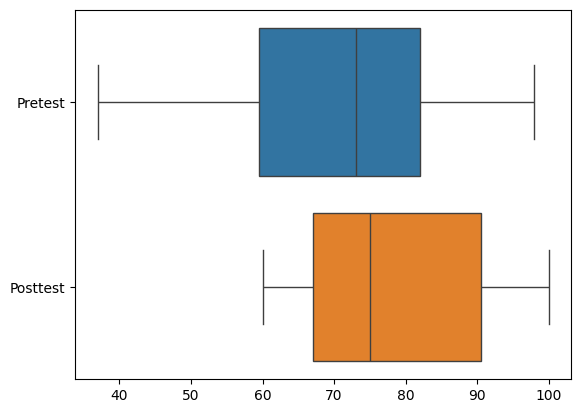

In [20]:
# Paired 데이터 상자그림 그리기

import seaborn as sns
sns.boxplot(data=Paired.iloc[:,[1,2]],orient='h')

In [22]:
# 대응표본 t-검정

## 양측검정
from scipy.stats import ttest_rel
print(ttest_rel(Paired.Pretest, Paired.Posttest))

## 단측검정
stat, pval = ttest_rel(Paired.Pretest, Paired.Posttest)
print("단측검정 p = ", pval/2)

TtestResult(statistic=-3.093705670004429, pvalue=0.007930923229026533, df=14)
단측검정 p =  0.003965461614513267


## 6. 모분산의 동일성에 대한 검정
- 직접계산

In [23]:
# Reading 데이터 불러오기

Reading = pd.read_csv("/content/drive/MyDrive/단기기초통계/Day3/data/Reading.csv")
New = Reading[Reading.Group == "New"]
Old = Reading[Reading.Group == "Old"]

In [27]:
# F_test 계산하는 함수 만들기

from scipy.stats import f
import numpy as np

def F_test(x, y):
  F = np.var(x, ddof = 1) / np.var(y, ddof = 1)
  df1 = x.size - 1
  df2 = y.size - 1
  pval = 2*(1-f.cdf(F, df1, df2))
  return print("F-값 = ",F, "p-값 = ",pval)

F_test(New.Score, Old.Score)

F-값 =  1.1454545454545453 p-값 =  0.8624138071371461


- 패키지 이용

In [28]:
# Bartlett 검정

from scipy.stats import bartlett
bartlett(New.Score, Old.Score)

BartlettResult(statistic=0.030098911091236386, pvalue=0.8622659908256447)

In [29]:
# Levene 검정

from scipy.stats import levene
levene(New.Score, Old.Score)

LeveneResult(statistic=0.1978798586572438, pvalue=0.6632376240724351)